In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles, make_moons
from helpers import *

In [2]:
d = 2
n = 500

data, centers = make_data(d, n, 3)

# Visualization application on Clustering
This problem has 4 exercises, numbered 0 through 3, and is worth a total of ten points. Exercise 3 depends on exercise 2, but exercises 0 and 1
are independent. ***The test cells are hidden but one test case is provided for debugging purposes.***

In this problem, we are going to work with data points on 2D plane (for visualization purposes), we will:

1. Use K-Means algorithm to cluster them into $K$ clusters.
2. Use kernel density estimation (KDE) to fit data in a non-parametric fashion.

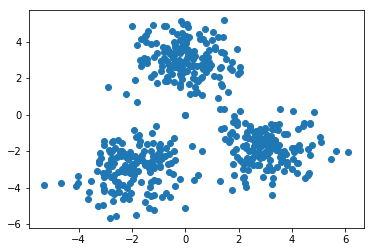

In [3]:
plt.scatter(data[:, 0], data[:, 1])

What do we mean by clustering? We aim to partition all points into $K$ classes $C_1, C_2, \cdots, C_K$ and find $K$ centers $\mu_1, \mu_2, \cdots, \mu_k$, such that

$$\sum_{k}\sum_{i} r_{ik} \|x_i - \mu_k\|^2$$

where $r_{ik}$ is the indicator of where $x_i$ is in class $C_k$.

## K-Means Clustering

Given $K$, K-Means algorithm works as follows,

1. Randomly initialize $K$ centers $\mu_1, \mu_2, \cdots, \mu_k$
2. Iteratively assign each $x_i$ to its nearest center $\mu_k$, and then reestimate $\mu_k$ based on assignment until converge.

**Exercise 0:** First, we will implement the `assign` function, which assigns data points to its nearest center. For example, suppose `data = [[101, 0], [99,1], [-100,2]], mu = [[100,0], [-100, 0]]`, then you would expect to return `membership = [0, 0, 1]`. If there are multiple centers that are equidistant to a point, pick the center with the lowest index, i.e., the first center in mu that is nearest to the point. (3 points) 

In [4]:
def distance(dd,mm):
    import math
    d=np.array(dd)-np.array(mm)
    return(math.sqrt(d.dot(d)))

def assign(data, mu):
    # data: (N, 2) numpy.array
    # mu: (K, 2) numpy.array
    # return: (N,) numpy.array indicating class membership of each data point
    membership = np.zeros(len(data))
    for i,vi in enumerate(data):
        for j,vj in enumerate(mu):
            d=distance(vi,vj)
            if j==0:
                dmin=d
                idx=0
            elif d<dmin:
                dmin=d
                idx=j
        membership[i]=idx 
        
    return membership

In [5]:
### Test Cell for Debugging
data1, centers1 = make_data(d, n, 3)
student_membership = assign(data1, centers1)
test_assign(data1, centers1, student_membership)

'Passed!'

In [6]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Next we implement `re_estimate` function. For each class $C_k$, we reestimate its center as 
$$\mu_k \gets \frac{1}{\sum_{i=1}^N r_{ik}} \sum_{i}r_{ik}x_i$$

**Exercise 1:** The function should return an array where each element gives the 2-D coordinates for the center of the respective class (3 points)

In [7]:
def re_estimate(data, membership):
     # data: (N, 2) numpy.array
     # membership: (N,) numpy.array indicating class membership of each data point   
     # mu: (K, 2) numpy.array
    
    n=np.zeros(int(membership.max()+1))
    sv=np.zeros(shape=(len(n),2))
    for i,c in zip(data,membership):
        
        idx=c.astype(int)
        sv[idx:idx+1,0:1]+=i[0]
        sv[idx:idx+1,1:2]+=i[1]
    
        n[idx]+=1
    
    for i in range(len(sv)):
        sv[i,0]/=n[i]
        sv[i,1]/=n[i]
    mu=sv

    return mu


In [8]:
### Test Cell for Debugging

data1, centers1 = make_data(d, n, 3)
membership1 = inst_assign(data1, centers1)
student_mu = re_estimate(data1, membership1)
test_re_estimate(data1, membership1, student_mu)


'Passed!'

In [9]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Let's put the pieces together and see how well it works.

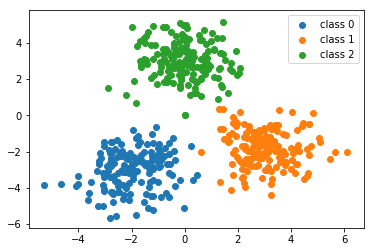

In [10]:
K = 3
mu = centers + 0.5 * np.random.randn(K, d)
max_iter = 20

for it in range(max_iter):
    membership = assign(data, mu)
    mu = re_estimate(data, membership)
    
for k in range(K):
    mask = membership == k
    x, y = data[mask, 0], data[mask, 1]
    plt.scatter(x, y, label='class {}'.format(k))

plt.legend()

## Kernel Density Estimation

We turn our attention to another question, what is the probability distribution of data? A powerful method is kernel density estimation (KDE). The probability density function is given by
$$ f(x) = \sum_{i=1}^N \frac{1}{N}K(\frac{x-x_i}{h})$$
where $K(z)=\frac{1}{\sqrt{2\pi}} \exp(-\frac{\|z\|^2}{2})$ is a kernel function and $\|z\|^2$ is the squared [euclidean norm](https://en.wikipedia.org/wiki/Norm_(mathematics)). 
**Hint:** You can use [numpy.linalg.norm](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html)

**Exercise 2** Implement K(z) based on the above kernel function. Return a numpy array with shape (500,)（2 points)

In [11]:
def kernel(z):
    import math
    from numpy import linalg as la

    # z: (N, 2) numpy.array
    # returns (N, 1) numpy.array
    zz=np.zeros(shape=(len(z)))
    for i,v in enumerate(z):
        zz[i]=math.exp(-v.dot(v)/2)/math.sqrt(2*np.pi)
        
    return  zz
    ###

In [12]:
### Test Cell for Debugging
data1, centers1 = make_data(d, n, 3)
student_kernel = kernel(data1)
test_kernel(data1, student_kernel)

'Passed!'

In [13]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


** Exercise 3 ** Based on the KDE function: $$ f(x) = \sum_{i=1}^N \frac{1}{N}K(\frac{x-x_i}{h})$$ 
Compute the probablity density at `[0,0]`, i.e., $f((0,0))$. This should return a **scalar** value. (2 points）

In [14]:
def compute(data, h):
    n=len(data)
    return sum(kernel(data1/h))/n
    


In [15]:
### Test Cell for Debugging

data1, centers1 = make_data(d, n, 3)
student_compute = compute(data1, h=1)
test_compute(data1, student_compute, 1)

'Passed!'

In [16]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Finally, use the nice visualization library `seaborn` in Python to visualize the kernel density estimation.

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


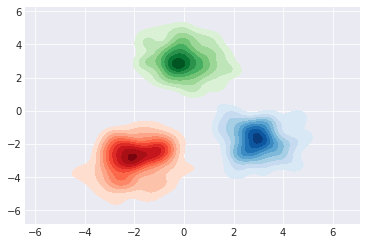

In [17]:
sns.set_style("darkgrid")
colors = ['Reds', 'Blues', 'Greens']

for k in range(K):
    mask = membership == k
    x, y = data[mask, 0], data[mask, 1]
    sns.kdeplot(x, y,
                cmap=colors[k], shade=True, shade_lowest=False)

**Fin!** You've reached the end of this problem. Don't forget to restart the
kernel and run the entire notebook from top-to-bottom to make sure you did
everything correctly. If that is working, try submitting this problem. (Recall
that you *must* submit and pass the autograder to get credit for your work!)